# Assignment 2018
## Fundamentals of Data Analysis

___

Summary statistics, such as <em>sums</em> and <em>means</em> are vey useful for describing general trends and aspects of data, but statistics alone can not fully depict any data set. There is a danger in relying only on summary statistics and ignoring the overall distribution [1]. Francis John "Frank" Anscombe (13 May 1918 – 17 October 2001), an English statistician realised this in 1973 and created several data sets, all with several identical statistical properties, to demonstrate the importance of visualizing data and also to highlight the effect that outliers can have on statistical findings of a dataset. Anscombe’s Quartet consists of four data sets, that appear to have similar summary statistics, yet when graphed the datasets tell a very different story. Each dataset consists of eleven X,Y pairs. 

### Anscombe's Quartet



| | x1    	| x2    	| x3    	| x4    	| y1    	| y2   	| y3    	| y4   	|
|------------------	|-------	|-------	|-------	|-------	|-------	|------	|-------	|------	|
| 1           	| 10    	| 10    	| 10    	| 8     	| 8.04  	| 9.14 	| 7.46  	| 6.58 	|
| 2           	| 8     	| 8     	| 8     	| 8     	| 6.95  	| 8.14 	| 6.77  	| 5.76 	|
| 3           	| 13    	| 13    	| 13    	| 8     	| 7.58  	| 8.74 	| 12.74 	| 7.71 	|
| 4           	| 9     	| 9     	| 9     	| 8     	| 8.81  	| 8.77 	| 7.11  	| 8.84 	|
| 5           	| 11    	| 11    	| 11    	| 8     	| 8.33  	| 9.26 	| 7.81  	| 8.47 	|
| 6           	| 14    	| 14    	| 14    	| 8     	| 9.96  	| 8.1  	| 8.84  	| 7.04 	|
| 7           	| 6     	| 6     	| 6     	| 8     	| 7.24  	| 6.13 	| 6.08  	| 5.25 	|
| 8           	| 4     	| 4     	| 4     	| 19    	| 4.26  	| 3.1  	| 5.39  	| 12.5 	|
| 9           	| 12    	| 12    	| 12    	| 8     	| 10.84 	| 9.13 	| 8.15  	| 5.56 	|
| 10          	| 7     	| 7     	| 7     	| 8     	| 4.82  	| 7.26 	| 6.42  	| 7.91 	|
| 11          	| 5     	| 5     	| 5     	| 8     	| 5.68  	| 4.74 	| 5.73  	| 6.89 	|




In [129]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
data = pd.read_csv('anscombe.csv')
data

,x1,x2,x3,x4,y1,y2,y3,y4
0,10,10,10,8,8.04,9.14,7.46,6.58
1,8,8,8,8,6.95,8.14,6.77,5.76
2,13,13,13,8,7.58,8.74,12.74,7.71
3,9,9,9,8,8.81,8.77,7.11,8.84
4,11,11,11,8,8.33,9.26,7.81,8.47
5,14,14,14,8,9.96,8.10,8.84,7.04
6,6,6,6,8,7.24,6.13,6.08,5.25
7,4,4,4,19,4.26,3.10,5.39,12.50
8,12,12,12,8,10.84,9.13,8.15,5.56
9,7,7,7,8,4.82,7.26,6.42,7.91


,x1,x2,x3,x4,y1,y2,y3,y4
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,9.000000,9.000000,9.000000,9.000000,7.500909,7.500909,7.500000,7.500909
std,3.316625,3.316625,3.316625,3.316625,2.031568,2.031657,2.030424,2.030579
min,4.000000,4.000000,4.000000,8.000000,4.260000,3.100000,5.390000,5.250000
25%,6.500000,6.500000,6.500000,8.000000,6.315000,6.695000,6.250000,6.170000
50%,9.000000,9.000000,9.000000,8.000000,7.580000,8.140000,7.110000,7.040000
75%,11.500000,11.500000,11.500000,8.000000,8.570000,8.950000,7.980000,8.190000
max,14.000000,14.000000,14.000000,19.000000,10.840000,9.260000,12.740000,12.500000


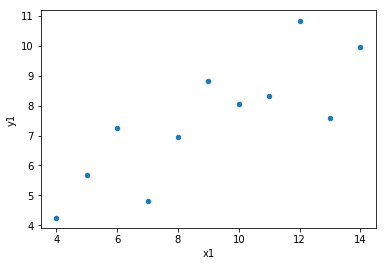

In [167]:
df = pd.DataFrame(data, columns=['x1', 'x2', 'x3', 'x4','y1' ,'y2','y3' ,'y4'])

df.plot.scatter(x='x1', y='y1'); # fantastic!!!!!!!!!!!!!!!!!!!!!11
df.describe()

Text(0.5,1,'Anscombe Set 1')

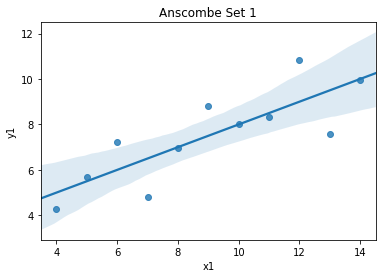

In [147]:
sns.regplot(df.x1, df.y1); # great!!!!!!!! mighty!!!!!!!!!!!!!!!!!
plt.title('Anscombe Set 1')

The residplot() function [3] can be a useful tool for checking whether the simple regression model is appropriate for a dataset. It fits and removes a simple linear regression and then plots the residual values for each observation. Ideally, these values should be randomly scattered around y = 0: 

Text(0.5,1,'Anscombe Set 1')

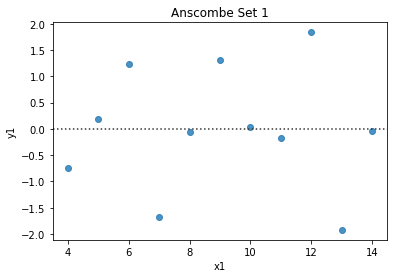

In [166]:
sns.residplot(df.x1, df.y1);
plt.title('Anscombe Set 1')

Text(0.5,1,'Anscombe Set 2')

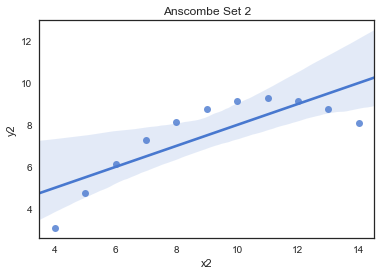

In [199]:
sns.regplot(df.x2, df.y2); # great!!!!!!!! mighty!!!!!!!!!!!!!!!!!
plt.title('Anscombe Set 2')

Text(0.5,1,'Anscombe Set 2')

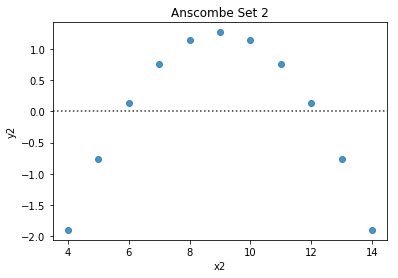

In [165]:
sns.residplot(df.x2, df.y2);
plt.title('Anscombe Set 2')

Text(0.5,1,'Anscombe Set 3')

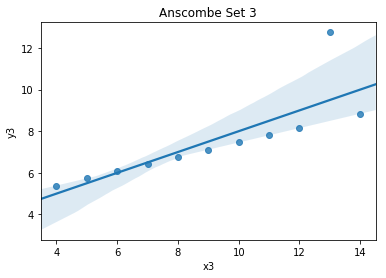

In [158]:
sns.regplot(df.x3, df.y3); # great!!!!!!!! mighty!!!!!!!!!!!!!!!!!
plt.title('Anscombe Set 3')

Text(0.5,1,'Anscombe Set 3')

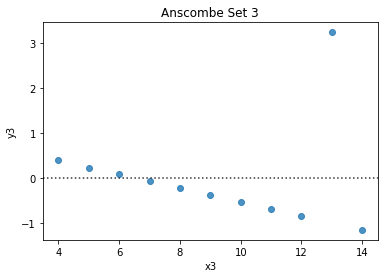

In [161]:
sns.residplot(df.x3, df.y3);
plt.title('Anscombe Set 3')

Text(0.5,1,'Anscombe Set 4')

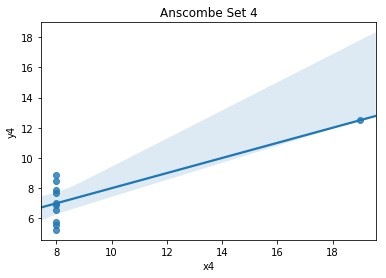

In [159]:
sns.regplot(df.x4, df.y4); # great!!!!!!!! mighty!!!!!!!!!!!!!!!!!
plt.title('Anscombe Set 4')

Text(0.5,1,'Anscombe Set 4')

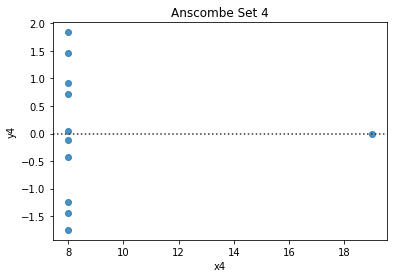

In [162]:
sns.residplot(df.x4, df.y4);
plt.title('Anscombe Set 4')

In [133]:
df.mean()

x1    9.000000
x2    9.000000
x3    9.000000
x4    9.000000
y1    7.500909
y2    7.500909
y3    7.500000
y4    7.500909
dtype: float64

In [134]:
df.var()

x1    11.000000
x2    11.000000
x3    11.000000
x4    11.000000
y1     4.127269
y2     4.127629
y3     4.122620
y4     4.123249
dtype: float64

In [93]:
np.corrcoef(X1,Y1)


array([[1.        , 0.81642052],
       [0.81642052, 1.        ]])

In [94]:
np.corrcoef(X2,Y2)

array([[1.        , 0.81623651],
       [0.81623651, 1.        ]])

In [95]:
np.corrcoef(X3,Y3)

array([[1.        , 0.81628674],
       [0.81628674, 1.        ]])

In [96]:
np.corrcoef(X4,Y4)

array([[1.        , 0.81652144],
       [0.81652144, 1.        ]])

The <em>CORRELATION</em> coefficient (a value between -1 and +1) tells you how strongly two variables are related to each other. The larger the magnitude, the stronger the correlation. If negative there is an inverse correlation, positive gives a regular correlation.<br/>

The resulting <em>CORRELATION</em> between column X and column y is 0.81 for the datasets, showing very little difference.<br/>

The fourth set of statistics is calculated using Excel's Linear Trendline Graph function. Data is taken from columns (X1:Y1), (X2:Y2), (X3:Y1) and (X1:Y1).

|              | x1:y1 	| x2:y2 | x3:y3 | x4:y4 | 
|------------- |-------	|-------|-------|-------|
| Slope       | 0.500 	| 0.500 | 0.500 | 0.500 |     
| Intercept   | 3.000 	| 3.000 | 3.001 | 3.002 | 

The <em>slope</em> is the vertical distance divided by the horizontal distance between any two points on the line, which is the rate of change along the regression line, which is equal to 0.5 in all cases.[2] <br/>
<em>Intercept</em> calculates the point at which a line will intersect the y-axis by using existing x-values and y-values. The <em>intercept</em> point is based on a best-fit regression line plotted through the known x-values and known y-values.[2] The resulting <em>intercept</em> values from Anascombe's data show little varience. 
 

In [122]:
df['X1'].corr(df['Y1']),df['X2'].corr(df['Y2']),df['X3'].corr(df['Y3']),df['X4'].corr(df['Y4'])

(0.81642051634484, 0.8162365060002428, 0.8162867394895984, 0.8165214368885028)

In [126]:
from scipy.stats import linregress
linregress(X1,Y1),linregress(X2,Y2),linregress(X3,Y3),linregress(X4,Y4)

(LinregressResult(slope=0.5000909090909091, intercept=3.0000909090909103, rvalue=0.8164205163448399, pvalue=0.00216962887307879, stderr=0.11790550059563408),
 LinregressResult(slope=0.5000000000000001, intercept=3.000909090909089, rvalue=0.816236506000243, pvalue=0.0021788162369107845, stderr=0.11796374596764074),
 LinregressResult(slope=0.4997272727272729, intercept=3.002454545454544, rvalue=0.8162867394895984, pvalue=0.002176305279228015, stderr=0.11787766222100221),
 LinregressResult(slope=0.4999090909090909, intercept=3.0017272727272726, rvalue=0.8165214368885028, pvalue=0.002164602347197222, stderr=0.11781894172968553))



### References
[1] https://heapanalytics.com/blog/data-stories/anscombes-quartet-and-why-summary-statistics-dont-tell-the-whole-story <br/>

[2] https://support.office.com/ <br/>

[3] Residplot https://seaborn.pydata.org/tutorial/regression.html <br/>

[4] er. 
<br/>